In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
print(df.shape)
df.head()

(200, 2)


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<function matplotlib.pyplot.show(close=None, block=None)>

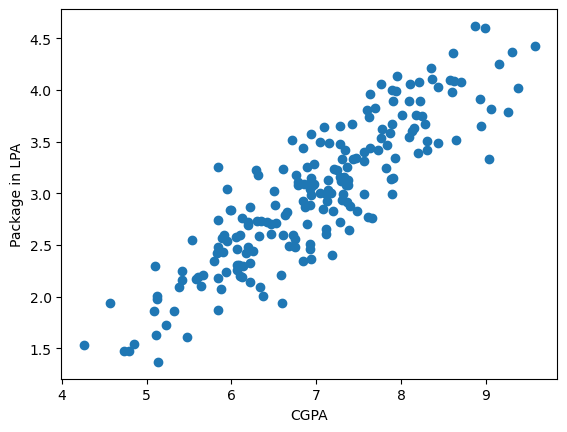

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel("Package in LPA")
plt.show

In [5]:
x = df.iloc[:,:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(x_train,y_train)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

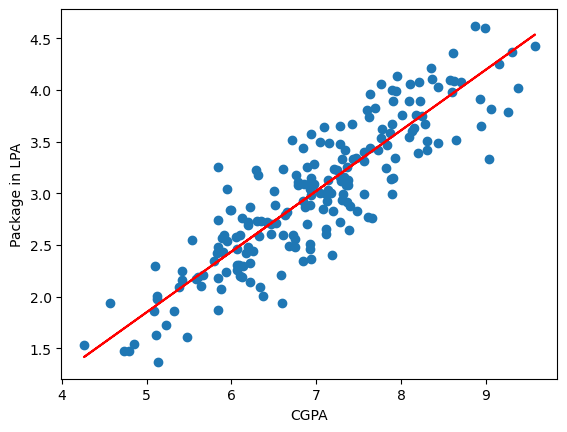

In [9]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color ='red')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')
plt.show

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [11]:
lr.predict(x_test)

array([3.08765691, 3.54491102, 4.21906771, 2.94696334, 3.18731486,
       3.09938138, 2.94110111, 3.140417  , 3.08765691, 3.18731486,
       3.13455477, 2.98213673, 3.07593245, 3.79112477, 2.68316289,
       3.55663548, 3.6152578 , 2.54833155, 2.34315343, 2.37832682,
       2.50729593, 2.40177575, 1.72761906, 2.90006548, 3.21076379,
       3.00558566, 2.98799896, 2.82385647, 2.73006075, 2.83558093,
       2.64212727, 2.47798477, 3.99044066, 4.37734798, 2.7945453 ,
       3.9611295 , 2.49557147, 2.09693968, 2.73592298, 2.23763325])

In [12]:
y_test.values

array([2.61, 2.99, 3.33, 2.87, 2.72, 2.93, 3.09, 2.83, 2.66, 3.48, 2.4 ,
       3.04, 3.64, 3.42, 2.72, 3.15, 3.76, 2.48, 2.48, 2.43, 2.76, 2.24,
       1.48, 3.08, 2.99, 3.28, 2.98, 2.82, 3.02, 2.49, 2.73, 2.26, 3.52,
       4.37, 2.6 , 3.98, 2.2 , 2.25, 2.89, 2.21])

In [13]:
y_pred =lr.predict(x_test)

In [14]:
print('mae',mean_absolute_error(y_test,y_pred))

mae 0.24999051829818955


In [15]:
print('mse',mean_squared_error(y_test,y_pred))

mse 0.10351480752583131


In [16]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.321737171501571


In [17]:
print("r2_score",r2_score(y_test,y_pred))

r2_score 0.6462843124730798


In [18]:
r2 = r2_score(y_test,y_pred)

In [19]:
x_test.shape

(40, 1)

In [20]:
# adjusted r2 Score
1 -((1-r2)*(40-1)/(40-1-1))

0.636976004906582

In [34]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.172419,3.26
1,5.12,0.129955,1.98
2,7.82,0.466477,3.25
3,7.42,0.631560,3.67
4,6.94,0.762210,3.57


Text(0, 0.5, 'Package(in lpa)')

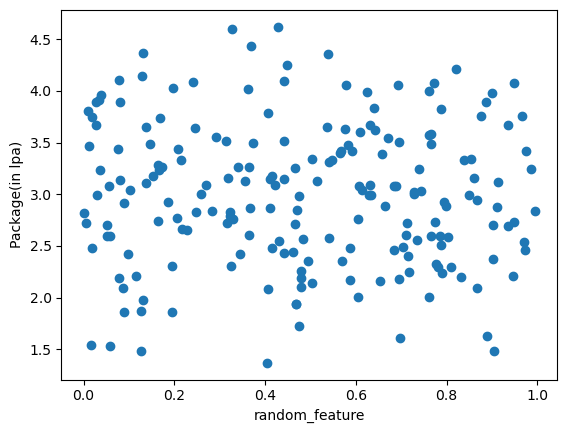

In [35]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [36]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7810097990120632


In [41]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7691724908505532

In [42]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [43]:
new_df2.sample(5)

,cgpa,iq,package
9,8.31,2.31,3.51
102,5.13,1.37,1.37
13,6.93,3.99,2.89
47,5.84,2.76,3.26
82,5.58,3.17,2.17


Text(0, 0.5, 'Package(in lpa)')

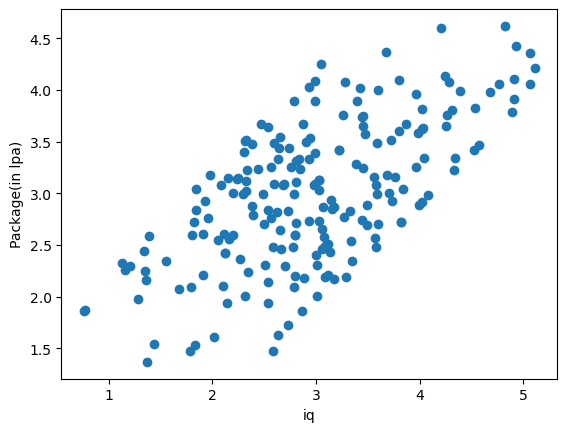

In [44]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [45]:
np.random.randint(-100,100)

-90

In [46]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [48]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8163554206724085


In [49]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8064286866547008